 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_path = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_returns = whale_returns.rename(columns={'PAULSON & CO.INC. ':'PAULSON & CO.INC.'})
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [20]:
# Reading S&P 500 Closing Prices
sp500_path = Path("./Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_returns.sample(5)

,Close
Date,
2014-01-27,$1781.56
2019-03-07,$2748.93
2015-06-09,$2080.15
2017-12-28,$2687.54
2014-02-26,$1845.16


In [21]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [22]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$","")
sp500_returns.head()

C:\Users\Duc L\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [23]:
# Calculate Daily Returns
sp500_returns["Close"] = sp500_returns["Close"].astype(float)
sp500_returns = sp500_returns.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [25]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [26]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close":"S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [27]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([whale_returns,algo_returns,sp500_returns],axis="columns", join = "inner")
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

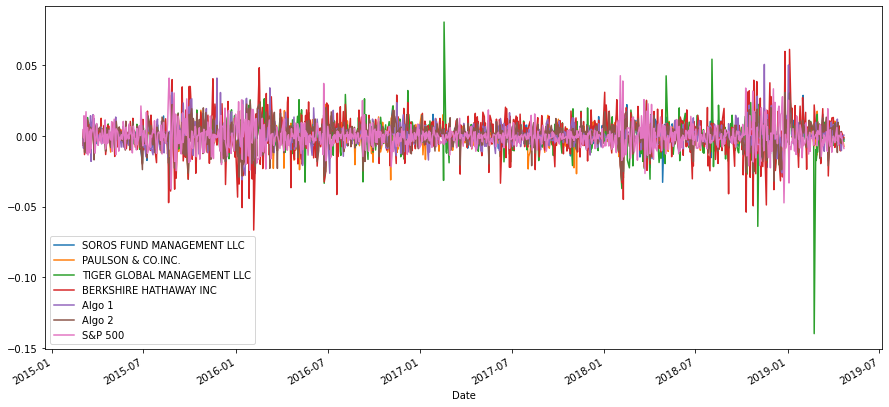

In [28]:
# Plot daily returns of all portfolios
df.plot(figsize=(15,7))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='Date'>

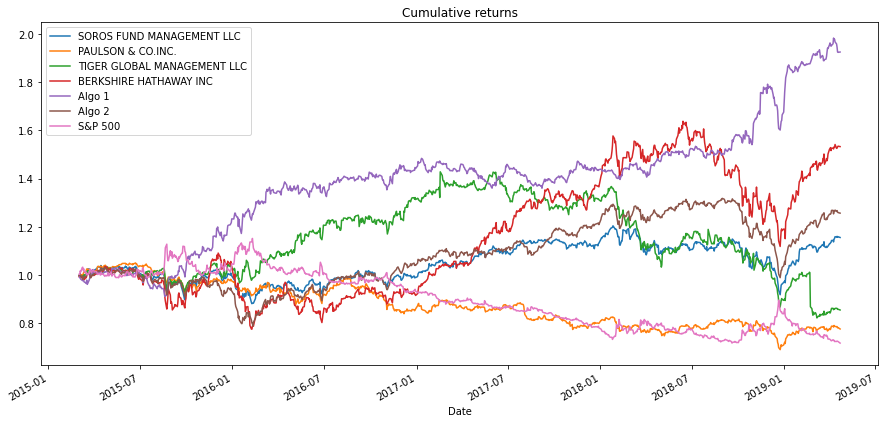

In [29]:
# Calculate cumulative returns of all portfolios
df_cum_returns = (1 + df).cumprod().dropna()

# Plot cumulative returns
df_cum_returns.plot(figsize=(15,7), title='Cumulative returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

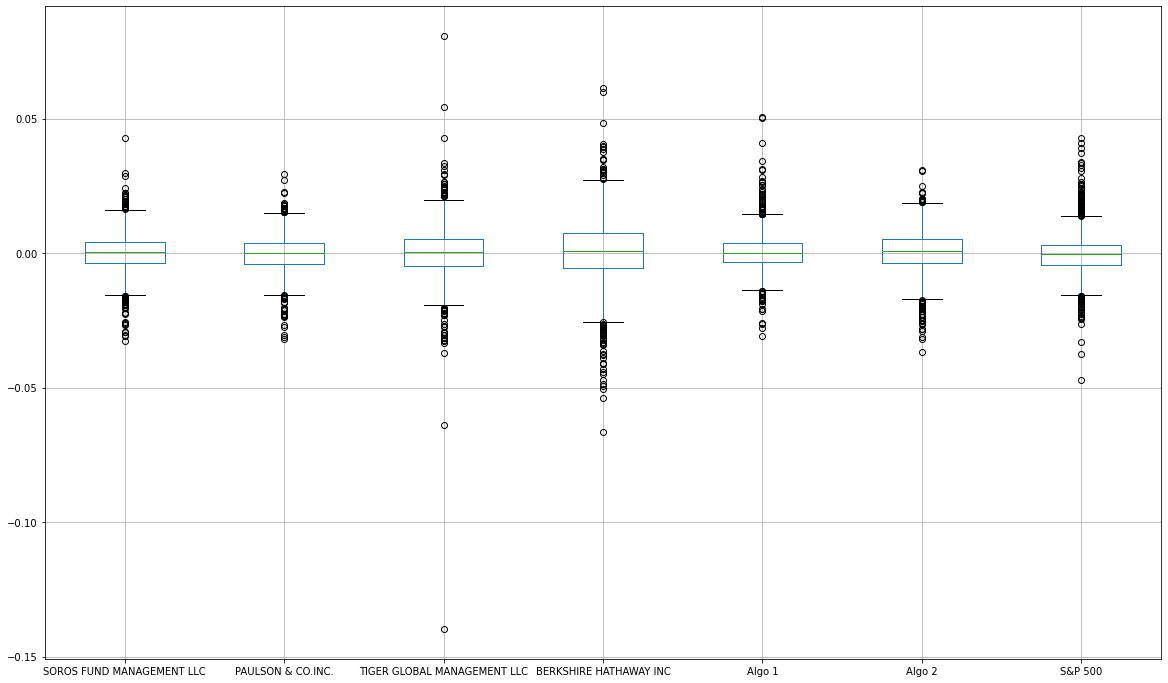

In [30]:
# Box plot to visually show risk
df.boxplot(figsize=(20,12))

### Calculate Standard Deviations

In [31]:
# Calculate the daily standard deviations of all portfolios
df_std = df.std()
df_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [35]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = df['S&P 500'].std()
sp500_std

0.00858688974707399

<AxesSubplot:>

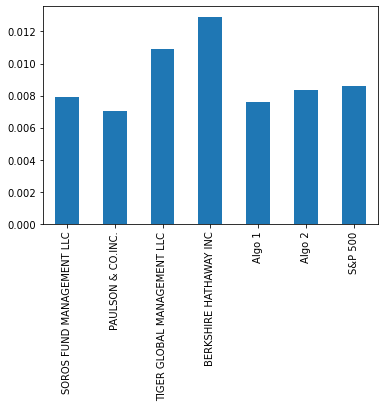

In [36]:
df_std.plot(kind='bar')

## Determine which portfolios are riskier than the S&P 500
* With regard to daily std, TIGER and BERKSHIRE are more risker than the S&P500

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized standard deviation (252 trading days)
df_annualised_std = df_std * np.sqrt(252)
df_annualised_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day rolling stadard deviation'}, xlabel='Date'>

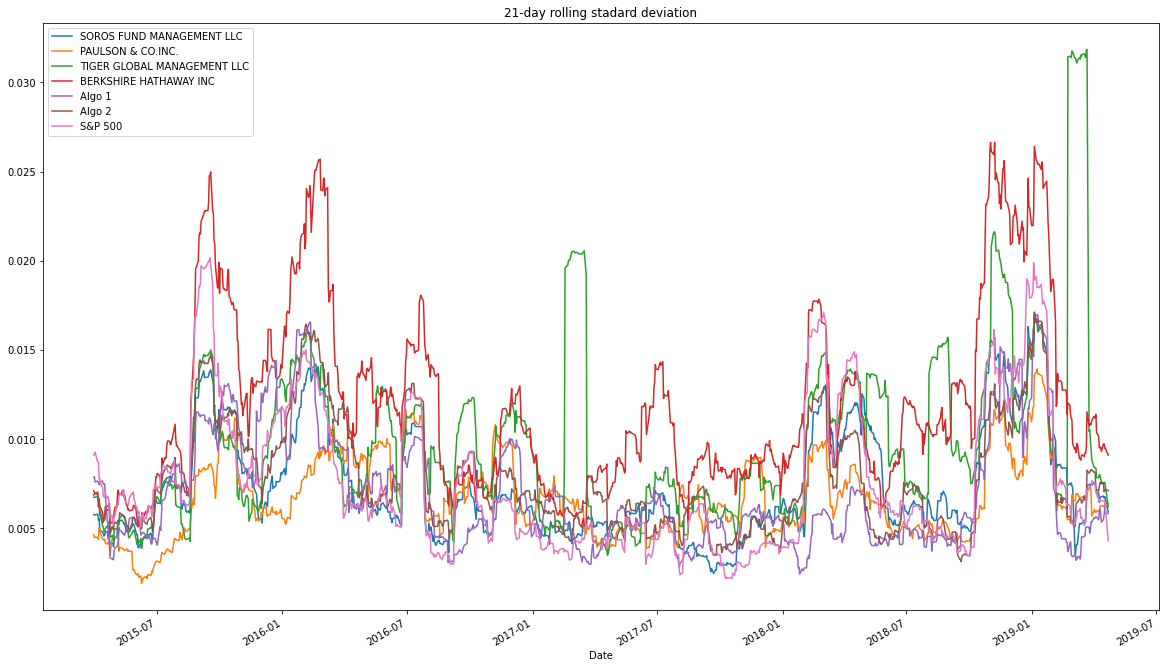

In [38]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_std_rolling = df.rolling(window=21).std().copy()
# Plot the rolling standard deviation
df_std_rolling.plot(figsize =(20,12), title='21-day rolling stadard deviation')

### Calculate and plot the correlation

In [39]:
# Calculate the correlation
df_corr = df.corr()
# Display de correlation matrix
df_corr.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

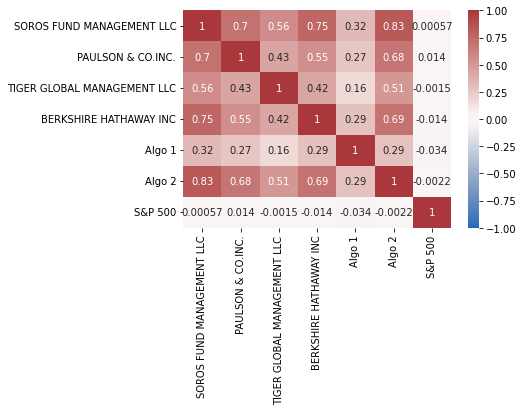

In [41]:
import seaborn as sns
sns.heatmap(df_corr, vmin=-1, vmax=1,center=0, annot=True, cmap='vlag')

* PAULSON & CO.INC. has highest correlation with the S&P 500, thus is mimic the S&P 500. However, the correlation of Paulson & Co. is only 0.014, close to 0, so it does really mimic the S&P 500 very closely.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500
* Choose Soros Fund Management LLC

In [42]:
# Calculate covariance of a single portfolio
soros_cov = df["SOROS FUND MANAGEMENT LLC"].cov(df["S&P 500"])
# Calculate variance of S&P 500
sp500_var=df.loc[:,"S&P 500"].var()
# Computing beta
soros_beta = soros_cov/sp500_var
soros_beta

0.0005275302230852882

<AxesSubplot:title={'center':'SOROS rolling 60-day beta'}, xlabel='Date'>

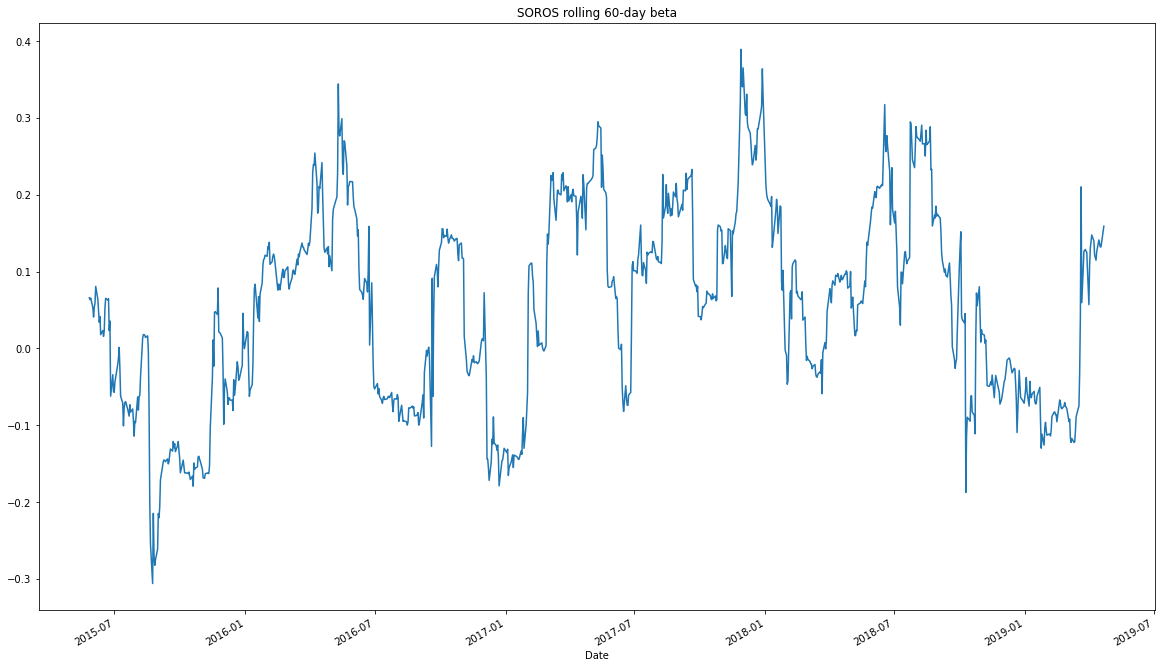

In [45]:
# Plot beta trend
cov_rolling = df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(df["S&P 500"]).dropna()
var_rolling = df['S&P 500'].rolling(window=60).var().dropna()
soros_beta_rolling = cov_rolling/var_rolling
soros_beta_rolling.plot(figsize=(20,12), title="SOROS rolling 60-day beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'21-day Exponentially Weighted Average of Standard Deviations'}, xlabel='Date'>

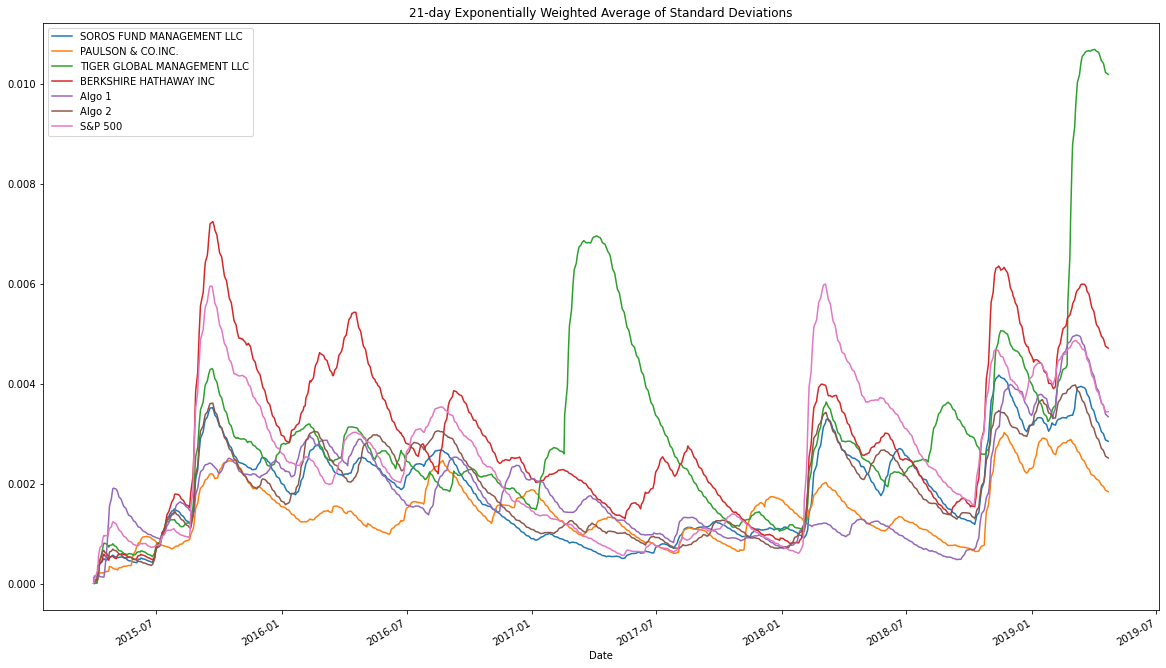

In [47]:
# Use `ewm` to calculate the rolling window
df_std_rolling.dropna()
df_std_rolling_ewm = df_std_rolling.ewm(halflife=21).std().dropna()
df_std_rolling_ewm.plot(figsize = (20,12), title='21-day Exponentially Weighted Average of Standard Deviations')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Annualized Sharpe Ratios
df_sharpe_ratios = ((df.mean()-df["S&P 500"].mean()) * 252) / (df.std() * np.sqrt(252))
df_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
S&P 500                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

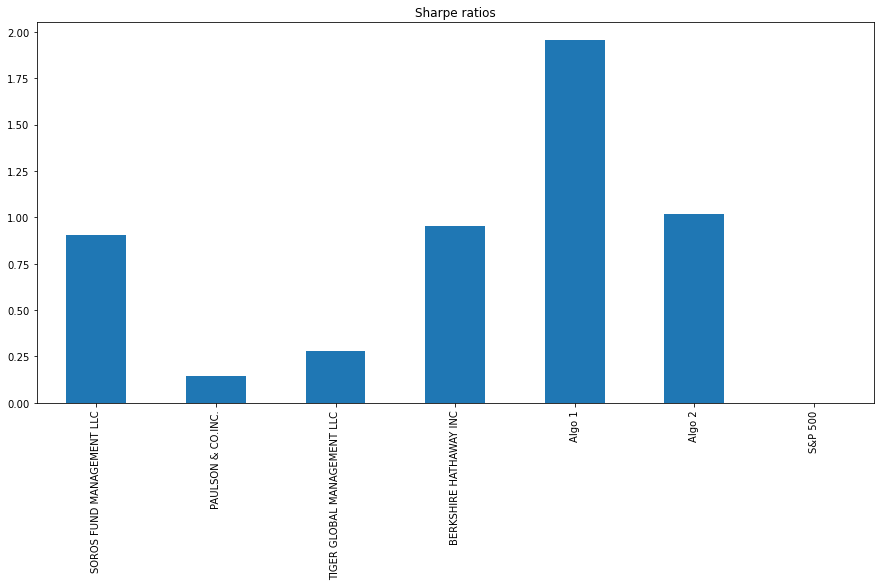

In [49]:
# Visualize the sharpe ratios as a bar plot
df_sharpe_ratios.plot(kind="bar", title="Sharpe ratios",figsize=(15,7))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

* Definition: Sharpe ratio is the measure of risk-adjusted return of a financial portfolio. A portfolio with a higher Sharpe ratio is considered superior relative to its peers. The measure was named after William F Sharpe, a Nobel laureate and professor of finance, emeritus at Stanford University. 
* Algo 1 has the highest Sharpe ratio. This suggests Algo 1 outperformed the market and the whales portfolios as it generates greater profit per additional unit of risk.
* Note: "Considering standard deviation as a proxy for risk has its pitfalls. Standard deviation takes into account both the positive as well as the negative deviation in returns from the mean, hence it doesn’t accurately measure the downside risk. Measures like Sortino, which only considers negative deviation from the mean return, can remove the limitation of Sharpe ratio to some extent."

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [50]:
# Reading data from 1st stock
path_goog = Path("./Resources/GOOG.csv")
goog = pd.read_csv(path_goog,parse_dates=True, index_col='Date', infer_datetime_format=True)
goog.rename(columns={"Close":"GOOG"},inplace=True)
goog.dropna(inplace=True)
goog.tail()

,GOOG
Date,
2022-06-24,2370.76
2022-06-27,2332.45
2022-06-28,2251.43
2022-06-29,2245.13
2022-06-30,2187.45


In [51]:
# Reading data from 2nd stock
path_sand= Path("./Resources/SAND.csv")
sand = pd.read_csv(path_sand,parse_dates=True, index_col='Date', infer_datetime_format=True)
sand.rename(columns={"Close":"SAND"},inplace=True)
sand.tail()

,SAND
Date,
2022-06-24,6.22
2022-06-27,6.40
2022-06-28,6.23
2022-06-29,6.19
2022-06-30,5.95


In [52]:
# Reading data from 3rd stock
path_uun = Path("./Resources/U.UN.csv")
uun = pd.read_csv(path_uun,parse_dates=True, index_col='Date', infer_datetime_format=True)
uun.rename(columns={"Close":"U.UN"},inplace=True)
uun.dropna(inplace=True)
uun.tail()

,U.UN
Date,
2022-06-24,13.84
2022-06-27,14.29
2022-06-28,13.95
2022-06-29,13.74
2022-06-30,13.87


In [53]:
# Reading data from 4th stock
path_lac = Path("./Resources/LAC.csv")
lac = pd.read_csv(path_lac,parse_dates=True, index_col='Date', infer_datetime_format=True)
lac.rename(columns={"Close":"LAC"},inplace=True)
lac.tail()

,LAC
Date,
2022-06-24,21.82
2022-06-27,22.72
2022-06-28,21.55
2022-06-29,20.50
2022-06-30,20.13


In [55]:
# Combine all stocks in a single DataFrame
df2 = pd.concat([goog,sand,lac,uun], join='inner', axis="columns")
df2.dropna(inplace=True)
df2.head()

,GOOG,SAND,LAC,U.UN
Date,,,,
2015-01-02,523.37,3.74,2.45,10.34
2015-01-05,512.46,3.78,2.35,10.30
2015-01-06,500.59,4.01,2.40,10.28
2015-01-07,499.73,3.80,2.44,10.48
2015-01-08,501.30,3.68,2.40,10.54


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol
# done

In [58]:
# Calculate daily returns
df2_change = df2.pct_change()
# Drop NAs
df2_change.dropna(inplace=True)
# Display sample data
df2_change.sample(5)

,GOOG,SAND,LAC,U.UN
Date,,,,
2016-10-14,0.000437,-0.021368,0.033898,0.007463
2017-11-13,-0.002257,0.000000,-0.045363,-0.022333
2015-08-05,0.023091,-0.080000,-0.027650,0.018182
2016-04-04,-0.006161,-0.047904,0.142857,-0.013100
2015-02-05,0.009226,0.019900,0.045455,0.005484


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [61]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
p_returns = df2_change.dot(weights).copy()
my_returns = pd.DataFrame(p_returns)
my_returns.rename(columns= {0: "My Portfolio"},inplace = True )
# Display sample data
my_returns.sample(5)

,My Portfolio
Date,
2020-07-21,-0.001346
2016-12-30,-0.023812
2021-03-04,-0.024637
2015-09-14,0.000405
2015-09-09,-0.023365


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [62]:
# Join your returns DataFrame to the original returns DataFrame
# Join your returns DataFrame to the original returns DataFrame
df3 = pd.concat([my_returns,df], axis='columns', join='inner')
df3.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-03-03,-0.012145,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,-0.003793,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,-0.014421,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.016762,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,-0.012103,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [64]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df3.dropna()
df3.isnull().sum()

My Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [65]:
# Calculate the annualized `std`
df3_annulised_std = df3.std() * np.sqrt(252)
df3_annulised_std

My Portfolio                   0.250066
SOROS FUND MANAGEMENT LLC      0.124573
PAULSON & CO.INC.              0.110723
TIGER GLOBAL MANAGEMENT LLC    0.173514
BERKSHIRE HATHAWAY INC         0.203999
Algo 1                         0.120991
Algo 2                         0.132349
S&P 500                        0.136396
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-day rolling standard deviation'}, xlabel='Date'>

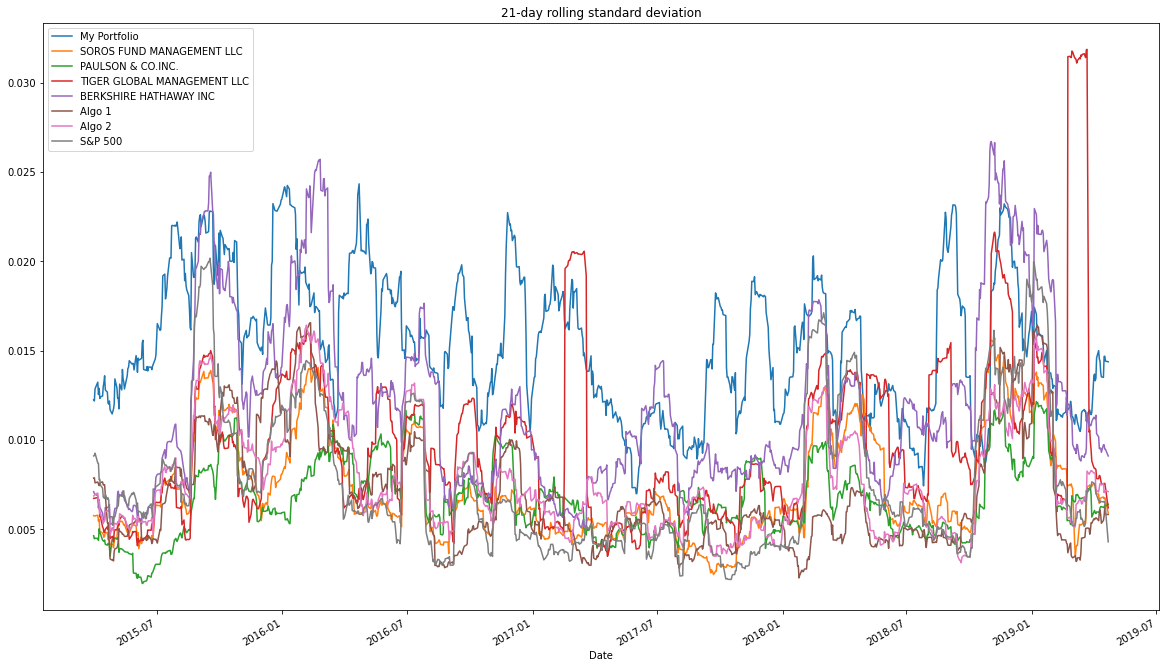

In [66]:
# Calculate rolling standard deviation
df3_rolling_std = df3.rolling(window=21).std().copy().dropna()
# Plot rolling standard deviation
df3_rolling_std.plot(figsize=(20,12), title='21-day rolling standard deviation')

### Calculate and plot the correlation

<AxesSubplot:>

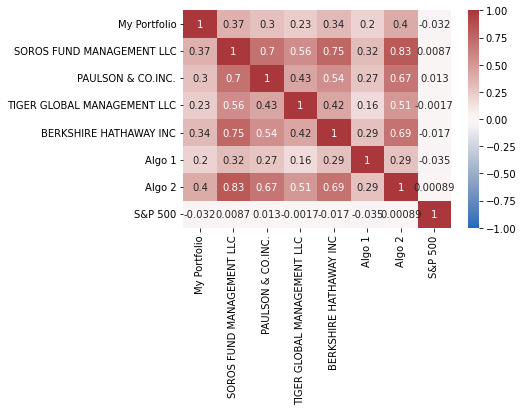

In [67]:
# Calculate and plot the correlation
df3_corr = df3.corr()
sns.heatmap(df3_corr, annot=True, cmap='vlag', vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-day Beta of My portfolio'}, xlabel='Date'>

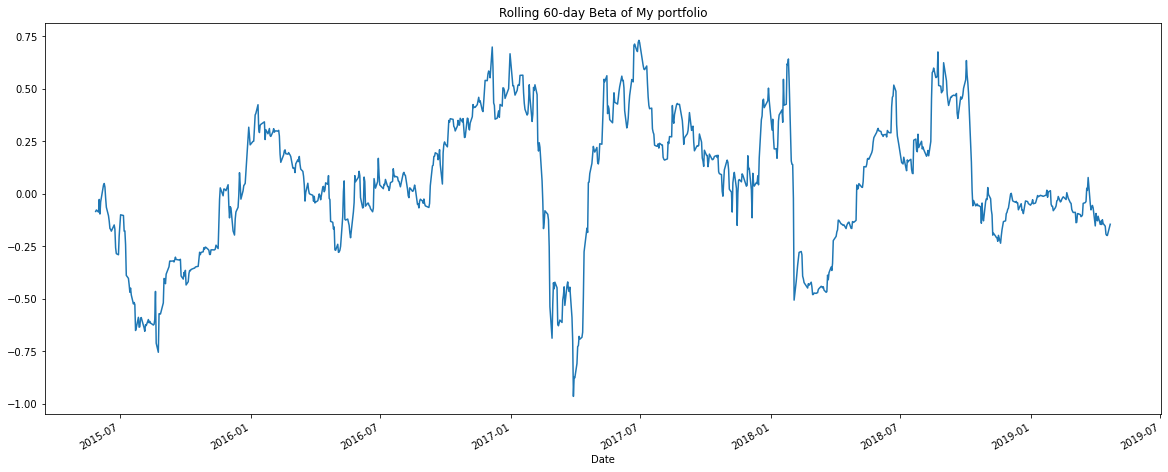

In [68]:
# Calculate and plot Beta

cov_rolling = df3['My Portfolio'].rolling(window=60).cov(df3['S&P 500'])
var_rolling = df3['S&P 500'].rolling(window=60).var()
beta_rolling = cov_rolling/var_rolling
beta_rolling.plot(figsize=(20,8), title='Rolling 60-day Beta of My portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [71]:
# Calculate Annualized Sharpe Ratios
df3_sharpe_ratios = ((df3.mean()-df3["S&P 500"].mean()) * 252) / (df3.std() * np.sqrt(252))
df3_sharpe_ratios

My Portfolio                   1.070059
SOROS FUND MANAGEMENT LLC      0.909173
PAULSON & CO.INC.              0.170799
TIGER GLOBAL MANAGEMENT LLC    0.304250
BERKSHIRE HATHAWAY INC         0.770462
Algo 1                         2.124930
Algo 2                         1.042822
S&P 500                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

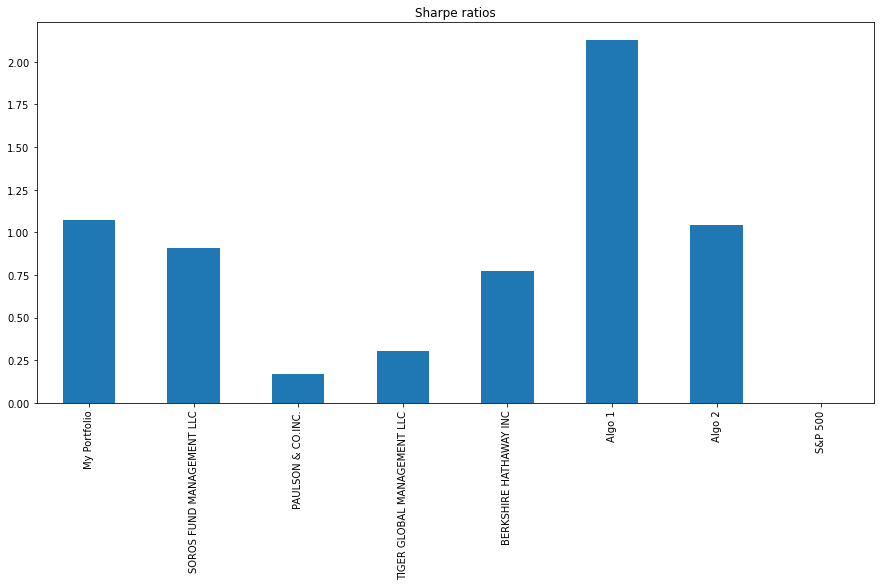

In [70]:
# Visualize the sharpe ratios as a bar plot
df3_sharpe_ratios.plot(kind='bar', title='Sharpe ratios', figsize=(15,7))

### How does your portfolio do?

Write your answer here!

* My Portfolio has:
    * the highest annualise standard deviation 0.250066, which suggests the highest risk comparing to the S&P 500 and other portfolio;
    * a high negative correlation with the S&P 500, which suggests the portfolio increases while the S&P 500 decreases, and vice-versa. An inverse correlation is important for investors since including assets in a portfolio that tend to move in opposite directions is key to achieving a well-diversified portfolio; and
    * a relatively high Sharpe ratio, similar to Algo 2 and Soros, this suggests relative good performanace comparing to other portfolios.
